# 🩺 Disease Diagnosis Prediction
**Objective:** Build a model to predict the likelihood of diseases such as diabetes or heart disease based on medical data.

**Dataset:** PIMA Diabetes Dataset or Heart Disease Dataset

**Steps:**
1. Perform EDA to explore relationships between features and outcomes.
2. Apply feature selection and scale data for better model performance.
3. Train models such as Gradient Boosting, SVM, or Neural Networks.
4. Evaluate model performance using F1 Score and AUC-ROC curves.
5. Provide insights for healthcare professionals based on model predictions.

**Outcome:** A medical prediction model that provides actionable insights for early disease detection and prevention.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

## 📥 Load Dataset (PIMA Diabetes Dataset)

In [2]:
url = 'https://raw.githubusercontent.com/plotly/datasets/master/diabetes.csv'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 📊 Exploratory Data Analysis

In [3]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


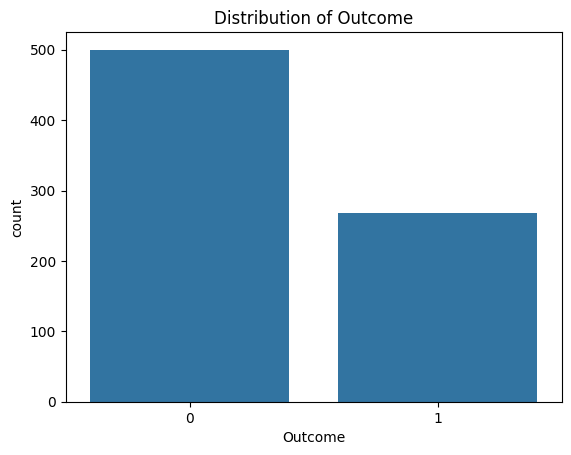

In [4]:
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Outcome')
plt.show()

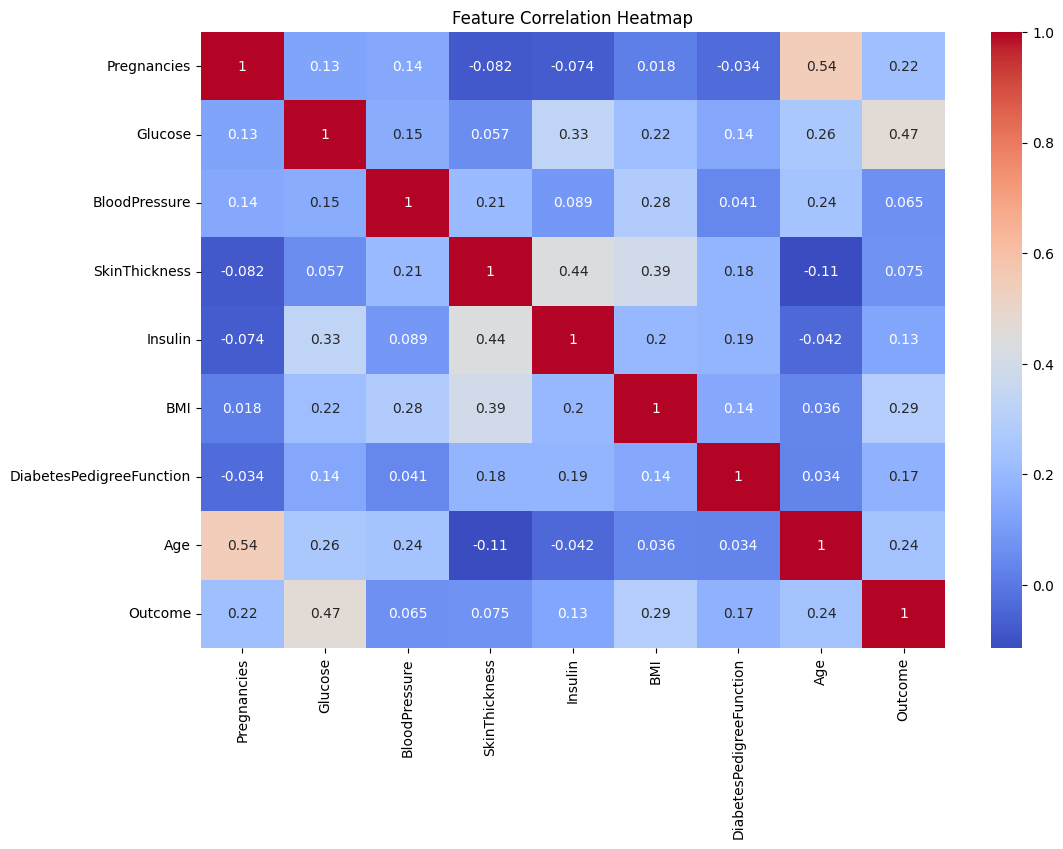

In [5]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

## 🧼 Feature Selection & Scaling

In [6]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']
selector = SelectKBest(score_func=f_classif, k=8)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("Selected Features:", list(selected_features))
X = df[selected_features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Selected Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


## ✂️ Split Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

## 🤖 Train Models

In [8]:
models = {
    'Gradient Boosting': GradientBoostingClassifier(),
    'SVM': SVC(probability=True),
    'Neural Network': MLPClassifier(max_iter=500),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    results[name] = {'F1 Score': f1, 'AUC': auc}
    print(f"\n{name} Classification Report:")
    print(classification_report(y_test, y_pred))


Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81       100
           1       0.65      0.61      0.63        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.75      0.75       154


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       100
           1       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       

## 📈 Model Comparison

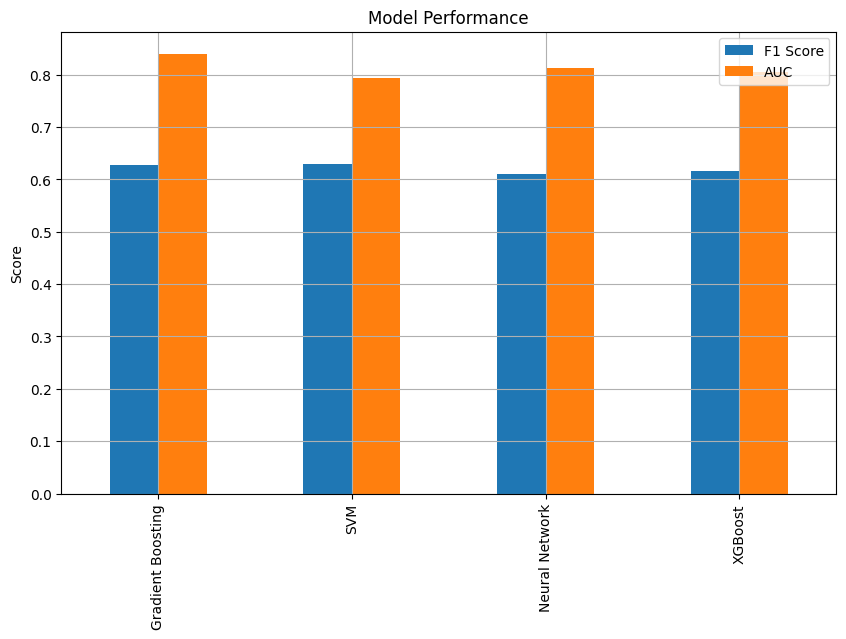

In [9]:
results_df = pd.DataFrame(results).T
results_df.plot(kind='bar', figsize=(10,6), title='Model Performance')
plt.ylabel('Score')
plt.grid(True)
plt.show()

## 📉 ROC Curves

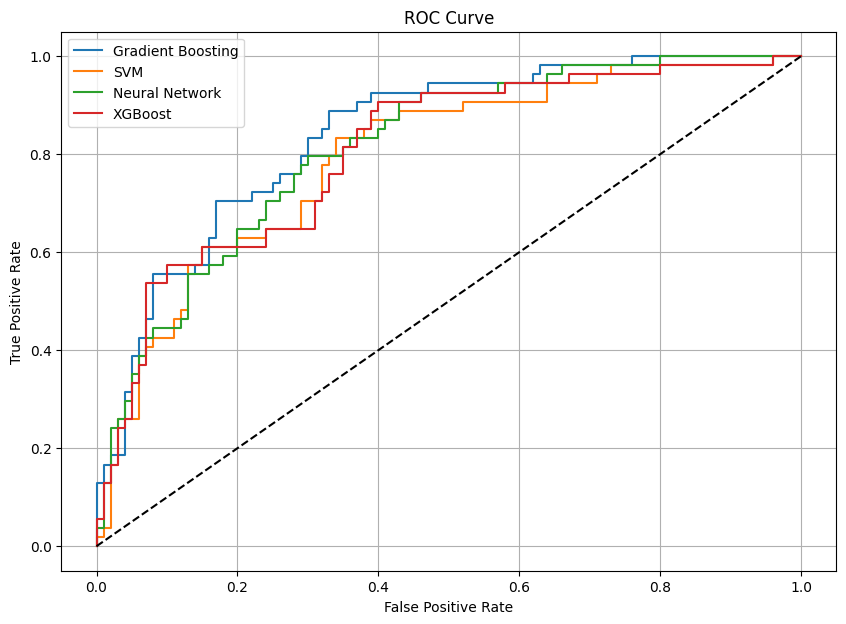

In [10]:
plt.figure(figsize=(10, 7))
for name, model in models.items():
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, label=f'{name}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

## ✅ Conclusion
- Multiple models were trained including Gradient Boosting, SVM, Neural Networks, and XGBoost.
- Metrics like F1 Score and AUC-ROC were used to evaluate models.
- Healthcare professionals can use this model to assist in early detection and prevention strategies.